In [18]:
import pandas as pd
from sklearn import model_selection
import ppscore as pps
import seaborn as sns

In [70]:
train = pd.read_csv('train.csv')
y = train.Transported
test = pd.read_csv('test.csv')
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6248,6611_03,Earth,False,F/1375/P,PSO J318.5-22,20.0,False,0.0,90.0,561.0,2.0,0.0,Nelley Philloway,True
2843,3067_01,Earth,True,G/483/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,France Dicksons,True
6244,6608_01,Earth,False,F/1374/P,TRAPPIST-1e,21.0,False,588.0,0.0,17.0,0.0,1548.0,Brada Rochaserry,False
246,0267_01,Earth,False,F/51/S,TRAPPIST-1e,13.0,False,118.0,0.0,0.0,754.0,1.0,Lilace Sancockett,False
6322,6681_01,Earth,False,F/1280/S,55 Cancri e,22.0,False,0.0,833.0,381.0,0.0,12.0,Belly Lerez,True


In [12]:
# create some folds for cross validation
# create kfold column filled with -1
train['kfold'] = -1

# next we have to randomize the rows of data
train = train.sample(frac=1).reset_index(drop = True)

# specify target variable
y = train.Transported.values

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold columnm
for f, (t_,v_) in enumerate(kf.split(X=train,y=y)):
    train.loc[v_,'kfold'] = f

# save the new csv with kfold column
train.to_csv('train_folds.csv',
            index = False)

In [21]:
# target variable is transported
df = pd.read_csv('train_folds.csv')
y = df.Transported
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,kfold
4626,2436_01,Earth,False,F/501/P,TRAPPIST-1e,21.0,False,759.0,0.0,0.0,NaN,40.0,Gileen Figuez,False,2
3094,2884_01,Mars,False,D/90/P,TRAPPIST-1e,37.0,False,912.0,0.0,0.0,NaN,0.0,Coats Erle,False,1
6022,0690_01,Mars,True,F/122/S,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,Yapich Start,True,3
5875,8058_01,Earth,False,F/1664/P,TRAPPIST-1e,29.0,False,12.0,2.0,0.0,432.0,1548.0,Ronard Hayertez,False,3
6954,7396_02,Europa,True,C/271/S,TRAPPIST-1e,31.0,True,0.0,0.0,0.0,0.0,0.0,Muontak Ingent,True,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  kfold         8693 non-null   int64  
 15  first_name    8493 non-null   object 
 16  last_name     8493 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(9)
memory usage: 1.1+ MB


In [118]:
# only columns without missing values are passengerId and transported
# have some work to do in order to patch the dataset
features = [
    f for f in df.columns if f not in (
        'kfold','PassengerId','Name','Transported','Cabin'
    )
]
num_cols = [
    'Age',
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck',
    'Total_spend'
]
cat_cols = [
    'HomePlanet',
    'CryoSleep',
    # 'Cabin',
    'Destination',
    'VIP',
    'first_name',
    'last_name',
    'deck',
    'num',
    'side'
]

/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selecti

<AxesSubplot:xlabel='x', ylabel='y'>

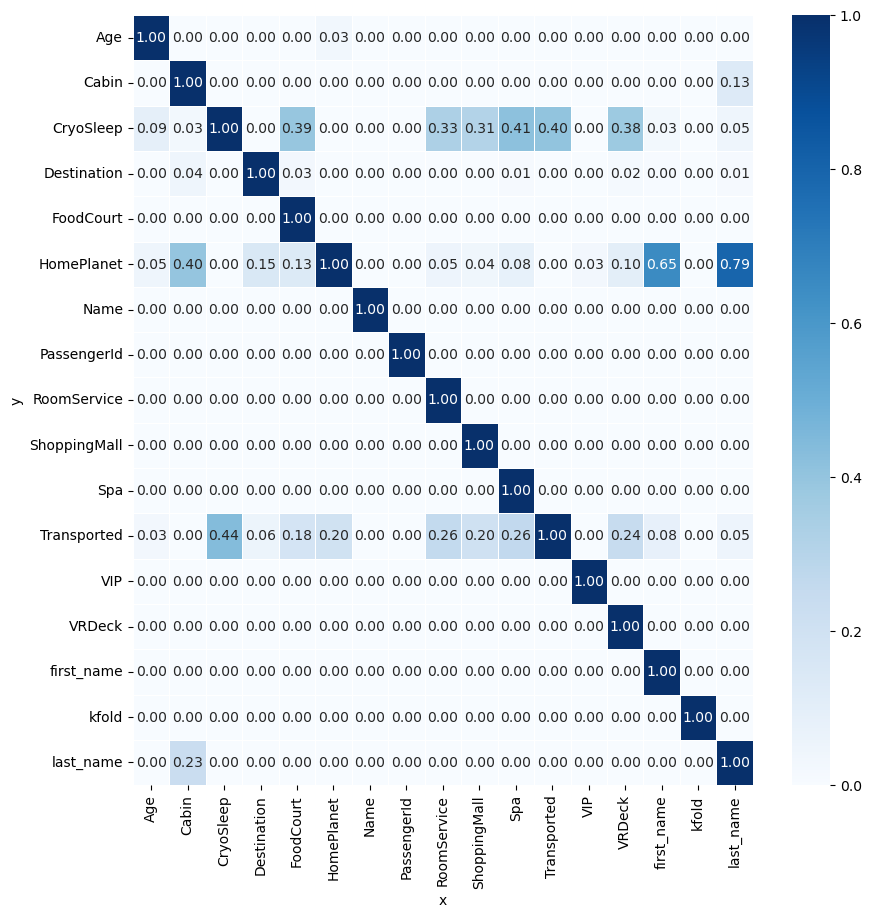

In [30]:
# let's examine some relationships that exist between factors
fig, ax = plt.subplots(figsize = (10,10))
ppscores = pps.matrix(df)
ppscores = ppscores[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")
sns.heatmap(
    ppscores, 
    vmin=0, 
    vmax=1, 
    cmap="Blues", 
    linewidths=0.7, 
    annot=True,
    fmt = '.2f'
)

#### Observations
- cabin has some predictive power on home planet
- cyrosleep can be predicted by foodcourt, roomservice, shopping mall, SPA, VRdeck
- 

In [119]:
def feature_engineer(df):
    df[['first_name','last_name']] = df.Name.str.split(' ', expand = True).iloc[:,0:2]
    df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)
    # fill numerical values with median
    for i in num_cols:
        df[i] = df[i].fillna(df[i].median())
    df['Total_spend'] = df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck
    # fill categorical variables with NONE
    for i in cat_cols:
        df[i] = df[i].fillna('NONE')
        df[i] = df[i].astype(str)
    return df

In [135]:
df = feature_engineer(df)
test_df = feature_engineer(test)

# create full dataset with train and test to fit standardscaler and OHE
full_data = pd.concat(
        [df[features], test_df[features]],
        axis = 0
    )

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='RoomService', ylabel='Age'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='Age'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='Age'>,
        <AxesSubplot:xlabel='Spa', ylabel='Age'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='Age'>,
        <AxesSubplot:xlabel='Total_spend', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='RoomService'>,
        <AxesSubplot:xlabel='RoomService', ylabel='RoomService'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='RoomService'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='RoomService'>,
        <AxesSubplot:xlabel='Spa', ylabel='RoomService'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='RoomService'>,
        <AxesSubplot:xlabel='Total_spend', ylabel='RoomService'>],
       [<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='FoodC

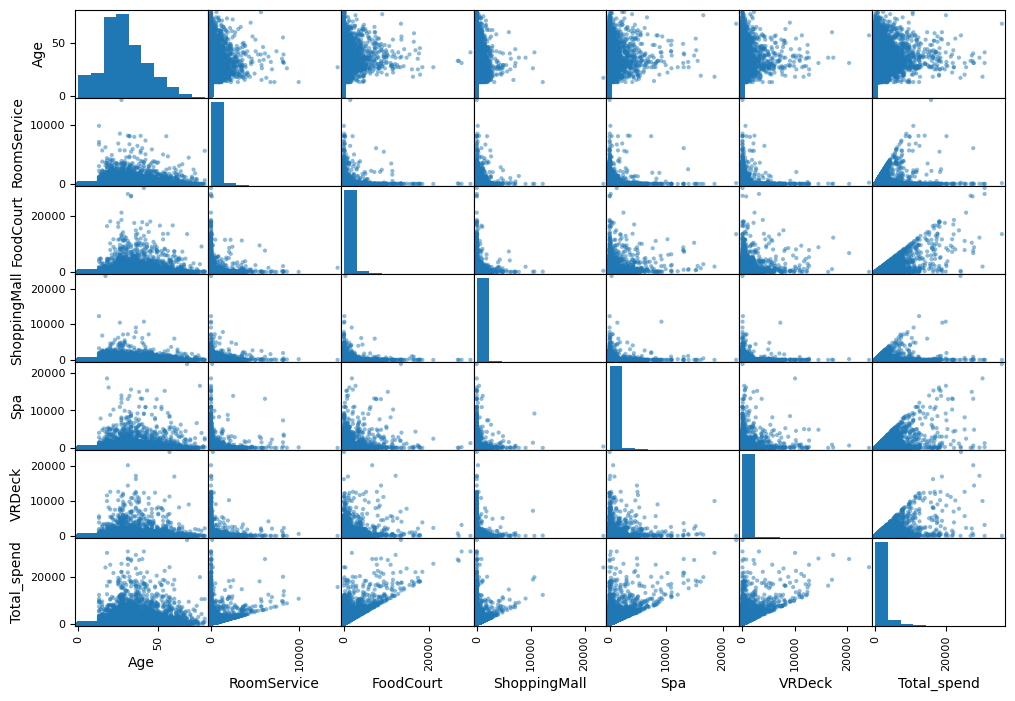

In [138]:
# another way to check correlations would be to use the scatter matrix attribute from pandas
# as correlation only checks for linear relationships we need to see if anyother patterns exist
from pandas.plotting import scatter_matrix

# attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[num_cols], figsize = (12,8))

In [121]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,kfold,first_name,last_name,deck,num,side,Total_spend
0,2732_01,Earth,True,G/435/S,55 Cancri e,16.0,NONE,0.0,0.0,0.0,...,0.0,Molley Hurles,True,0,Molley,Hurles,G,435,S,0.0
1,6990_01,Earth,False,NONE,PSO J318.5-22,21.0,False,1.0,22.0,0.0,...,2.0,Lison Franton,False,0,Lison,Franton,NONE,NONE,NONE,674.0
2,8605_03,Europa,True,C/324/S,55 Cancri e,13.0,NONE,0.0,0.0,0.0,...,0.0,Spuri Netshaless,True,0,Spuri,Netshaless,C,324,S,0.0
3,8136_02,Europa,False,C/268/P,TRAPPIST-1e,60.0,False,0.0,5998.0,0.0,...,8.0,Achium Inderad,False,0,Achium,Inderad,C,268,P,10800.0
4,6096_01,Mars,False,F/1162/S,TRAPPIST-1e,41.0,False,239.0,1.0,1048.0,...,0.0,Berk Wooes,True,0,Berk,Wooes,F,1162,S,1288.0


In [122]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  object 
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  object 
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  first_name    12970 non-null  object 
 11  last_name     12970 non-null  object 
 12  deck          12970 non-null  object 
 13  num           12970 non-null  object 
 14  side          12970 non-null  object 
 15  Total_spend   12970 non-null  float64
dtypes: float64(7), object(9)
memory usage: 1.7+ MB


In [123]:
# pipeline to scale numerical values and one hot encode categorical values
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline  = ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(),cat_cols),
])

full_pipeline.fit(full_data)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck',
                                  'Total_spend']),
                                ('cat', OneHotEncoder(),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'first_name', 'last_name', 'deck',
                                  'num', 'side'])])

In [124]:
x_train = full_pipeline.transform(df[features])
x_test = full_pipeline.transform(test_df[features])

In [125]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train, df.Transported)

/Users/lucasshwed/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
from sklearn import metrics
logres_preds = model.predict(x_train)
print(f'AUC = {round(metrics.roc_auc_score(y,logres_preds),3)}')

AUC = 0.498


In [88]:
# create predictions on test set
test_preds = model.predict(x_test)
sub_logres = pd.DataFrame({
    'PassengerId':test_df.PassengerId,
    'Transported':test_preds
})

In [89]:
sub_logres.to_csv('logres_submission.csv',
                  index = False)

In [127]:
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_jobs = -1)
model.fit(x_train,y)
rf_preds = model.predict(x_train)
print(f'AUC = {round(metrics.roc_auc_score(y,rf_preds),3)}')

AUC = 1.0


In [74]:
rf_test_preds = model.predict(x_test)
sub_rf = pd.DataFrame({
    'PassengerId':test_df.PassengerId,
    'Transported':rf_test_preds
})
sub_rf.to_csv('rf_submission.csv',
              index = False)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y)

KNeighborsClassifier()

In [129]:
knn_preds = knn.predict(x_train)
print(f'AUC = {round(metrics.roc_auc_score(y,knn_preds),3)}')

AUC = 0.686


In [96]:
knn_test_preds = knn.predict(x_test)
sub_rf = pd.DataFrame({
    'PassengerId':test_df.PassengerId,
    'Transported':knn_test_preds
})
sub_rf.to_csv('knn_submission.csv',
              index = False)

In [132]:
from sklearn.svm import SVC

model = SVC(C = 10)
model.fit(x_train,y)
svm_preds = model.predict(x_train)
print(f'AUC = {round(metrics.roc_auc_score(y,svm_preds),3)}')


AUC = 0.999


In [133]:
svm_test_preds = model.predict(x_test)
sub_svm = pd.DataFrame({
    'PassengerId':test_df.PassengerId,
    'Transported':svm_test_preds
})
sub_svm.to_csv('svm_submission.csv',
              index = False)

In [131]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [33]:
# # we can try using nearest neighbours to fill categorical values
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors = 5) 
# # fit on the dataset
# imputer.fit(df[features])
# # transform the dataset
# Xtrans = imputer.transform(df[features])

ValueError: could not convert string to float: 'Earth'